In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

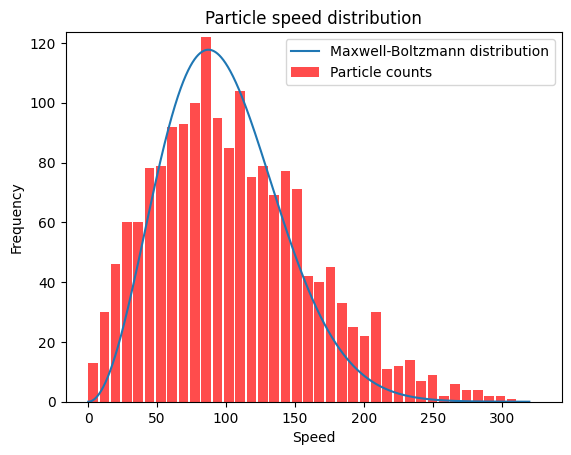

In [59]:
def maxwellBoltzmannFunction(energy, mass, speed):
    parameter = mass*speed*speed/(2*energy)
    return parameter*np.exp(-parameter)

speed_histograms = pd.read_csv("speed_distributions.csv")
bins_global = pd.read_csv("distribution_bins.csv")
# Example data: histograms for each time step
# Each row represents a time step, and columns represent histogram bin counts
histogram_data = speed_histograms.values

# Histogram bin upper limits
bin_upper_limits = np.linspace(0, 320, 40)
maxSpeed = 320
speeds = np.arange(0,maxSpeed,0.1)
distribution = 320*maxwellBoltzmannFunction(3800,1, speeds)
# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the histogram plot
bars = ax.bar(bin_upper_limits, histogram_data[0],width=7, align='edge', alpha=0.7, color = 'red', label = 'Particle counts')
distribution_plot = ax.plot(speeds, distribution, label = 'Maxwell-Boltzmann distribution')
# Set labels and title
ax.set_xlabel('Speed')
ax.set_ylabel('Frequency')
ax.set_title('Particle speed distribution')
ax.legend()
# Update function for animation
def update(frame):
    for bar, data in zip(bars, histogram_data[frame]):
        bar.set_height(data)
    return bars

# Create the animation
animation = FuncAnimation(fig, update, frames=len(histogram_data), blit=True)
animation.save('animated_histogram.mp4', writer='ffmpeg', fps=6, dpi=300)

plt.show()